In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pal = sns.color_palette()

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

# Preview data
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"label", "v2":"sms_text"})
df.head()

,label,sms_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.label.value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [5]:
messages = pd.Series(df['sms_text'].tolist()).astype(str)
ham_messages = pd.Series(df[df['label'] == 'ham']['sms_text'].tolist()).astype(str)
spam_messages = pd.Series(df[df['label'] == 'spam']['sms_text'].tolist()).astype(str)

# Create the corresponding distribution of character counts for each list.
# We count the number of characters in each message using the `len` function.
dist_all = messages.apply(len)
dist_ham = ham_messages.apply(len)
dist_spam = spam_messages.apply(len)

C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


# Summary statistics for character count of all messages
mean-all 80.12 
std-all 59.69 
min-all 2.00 
max-all 910.00


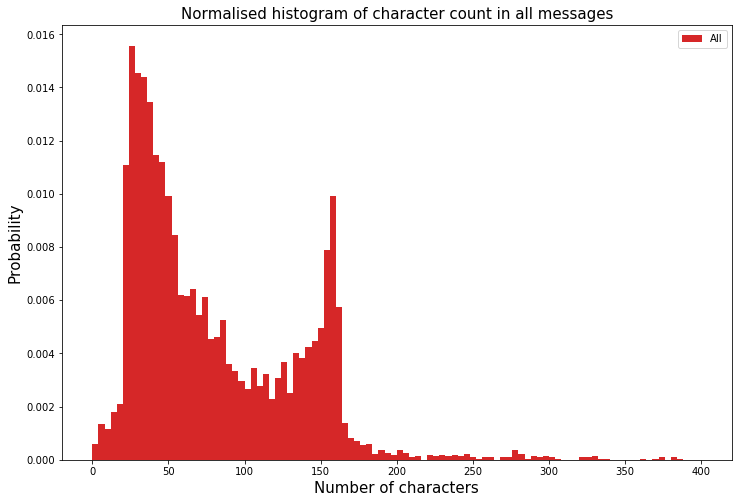

In [6]:
plt.figure(figsize=(12, 8))
plt.hist(dist_all, bins=100, range=[0,400], color=pal[3], normed=True, label='All')
plt.title('Normalised histogram of character count in all messages', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('# Summary statistics for character count of all messages')
print('mean-all {:.2f} \nstd-all {:.2f} \nmin-all {:.2f} \nmax-all {:.2f}'.format(dist_all.mean(), 
                          dist_all.std(), dist_all.min(), dist_all.max()))

C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Summary statistics for character count of ham vs spam messages
mean-ham  71.02   mean-spam 138.87 
std-ham   58.02   std-spam   29.18 
min-ham    2.00   min-ham    13.00 
max-ham  910.00   max-spam  224.00


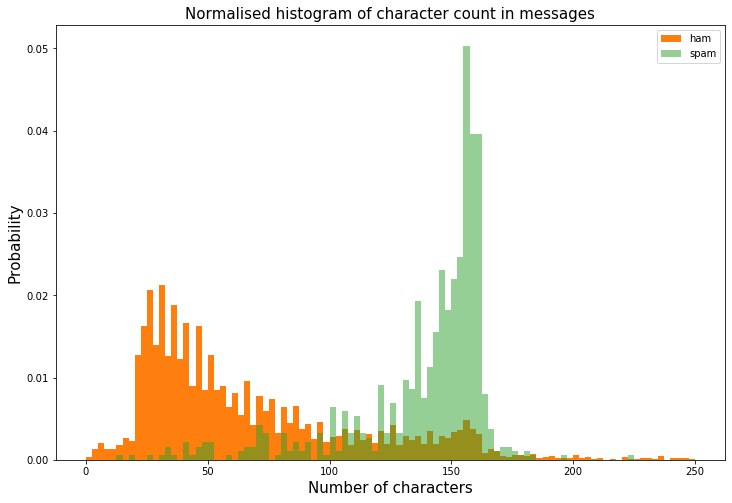

In [7]:
plt.figure(figsize=(12,8))
plt.hist(dist_ham, bins=100, range=[0,250], color=pal[1], normed=True, label='ham')
plt.hist(dist_spam, bins=100, range=[0, 250], color=pal[2], normed=True, alpha=0.5, label='spam')
plt.title('Normalised histogram of character count in messages', fontsize=15)
plt.legend()
plt.xlabel('Number of characters', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('# Summary statistics for character count of ham vs spam messages')
print('mean-ham  {:.2f}   mean-spam {:.2f} \nstd-ham   {:.2f}   std-spam   {:.2f} \nmin-ham    {:.2f}   min-ham    {:.2f} \nmax-ham  {:.2f}   max-spam  {:.2f}'.format(dist_ham.mean(), 
                         dist_spam.mean(), dist_ham.std(), dist_spam.std(), dist_ham.min(), dist_spam.min(), dist_ham.max(), dist_spam.max()))

In [8]:
dist_all = messages.apply(lambda x: len(x.split(' ')))
dist_ham = ham_messages.apply(lambda x: len(x.split(' ')))
dist_spam = spam_messages.apply(lambda x: len(x.split(' ')))

C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


# Summary statistics for word count of all messages
mean-all 15.61 
std-all 11.42 
min-all 1.00 
max-all 171.00


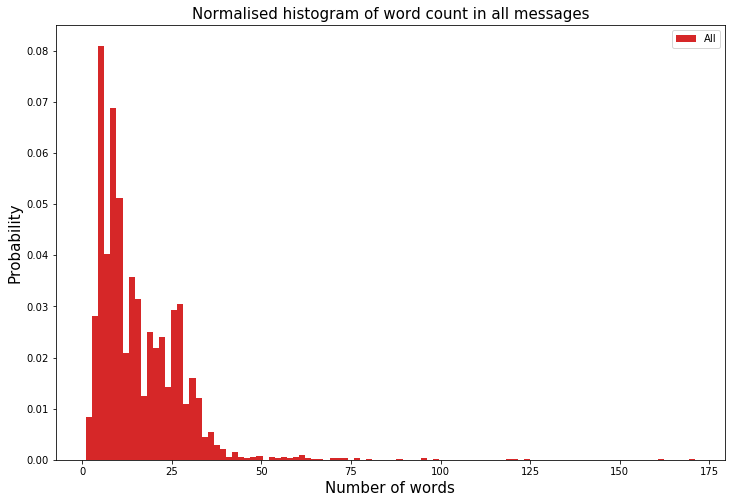

In [9]:
plt.figure(figsize=(12, 8))
plt.hist(dist_all, bins=100, color=pal[3], normed=True, label='All')
plt.title('Normalised histogram of word count in all messages', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('# Summary statistics for word count of all messages')
print('mean-all {:.2f} \nstd-all {:.2f} \nmin-all {:.2f} \nmax-all {:.2f}'.format(dist_all.mean(), 
                          dist_all.std(), dist_all.min(), dist_all.max()))

C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


# Summary statistics for word count of ham vs spam messages
mean-ham  14.32   mean-spam 23.89 
std-ham   11.54   std-spam   5.83 
min-ham    1.00   min-ham    2.00 
max-ham  171.00   max-spam  35.00


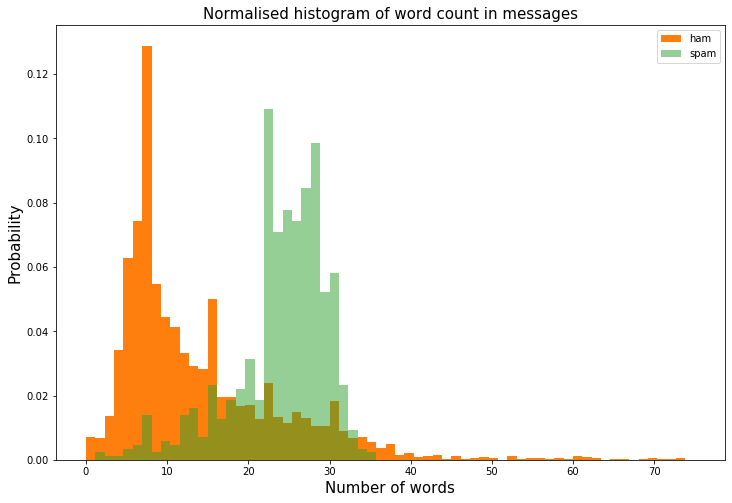

In [10]:
plt.figure(figsize=(12,8))
plt.hist(dist_ham, bins=65, range=[0,75], color=pal[1], normed=True, label='ham')
plt.hist(dist_spam, bins=65, range=[0, 75], color=pal[2], normed=True, alpha=0.5, label='spam')
plt.title('Normalised histogram of word count in messages', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('# Summary statistics for word count of ham vs spam messages')
print('mean-ham  {:.2f}   mean-spam {:.2f} \nstd-ham   {:.2f}   std-spam   {:.2f} \nmin-ham    {:.2f}   min-ham    {:.2f} \nmax-ham  {:.2f}   max-spam  {:.2f}'.format(dist_ham.mean(), 
                         dist_spam.mean(), dist_ham.std(), dist_spam.std(), dist_ham.min(), dist_spam.min(), dist_ham.max(), dist_spam.max()))

In [11]:
# Add our features to our dataframe
df['word_count'] = pd.Series(df['sms_text'].tolist()).astype(str).apply(lambda x: len(x.split(' ')))
df['char_count'] = pd.Series(df['sms_text'].tolist()).astype(str).apply(len)

# For some models the target label has to be int, float or bool
df['is_spam'] = (df['label'] == 'spam')

# Check things worked as expected
df.head()

,label,sms_text,word_count,char_count,is_spam
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,False
1,ham,Ok lar... Joking wif u oni...,6,29,False
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,True
3,ham,U dun say so early hor... U c already then say...,11,49,False
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,False


In [12]:
from sklearn.model_selection import train_test_split

X = df[['word_count', 'char_count']]
y = df[['is_spam']]

# Split data into training and test sets
# TODO: Might want to split such that train and test sets have equal proportion of spam messages
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split some training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'error'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-error:0.077139	valid-error:0.067265
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
[10]	train-error:0.077139	valid-error:0.067265
[20]	train-error:0.076858	valid-error:0.067265
[30]	train-error:0.073773	valid-error:0.070628
[40]	train-error:0.070687	valid-error:0.071749
[50]	train-error:0.075175	valid-error:0.073991
Stopping. Best iteration:
[0]	train-error:0.077139	valid-error:0.067265



In [14]:
from sklearn.metrics import accuracy_score

# Predict values for test set
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

# Apply function round() to each element in np array
# so predictions are all either 0 or 1.
npround = np.vectorize(round)
p_test_ints = npround(p_test)

# Error rate for test set
accuracy = accuracy_score(y_test, p_test_ints)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9103139013452914


#### For Lightgbm

In [15]:
y_validd = np.where(y_valid.is_spam==False,0,1 )
y_trainn = np.where(y_train.is_spam==False,0,1 )
y_testt = np.where(y_test.is_spam==False,0,1 )

In [16]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train,
                         label=(y_trainn.astype(int)),
                        )
param = {'num_leaves':60, 'objective':'binary','max_depth':4,'learning_rate':0.1,'max_bin':2000,"is_unbalance":True,
        #"categorical_feature":[1,2,3,4,5,6,8,10,11,13,14,15,16,17,18],
         'boost_from_average':True,'reg_sqrt':True,
         "boosting":"dart",
         "use_missing":True,
         "zero_as_missing":True,          
         #"max_cat_to_onehot":10,
         "top_k":10000,
         #"cat_smooth":10.0,"cat_l2":10
        "tree_learner":"data",
         "min_child_weight":1.1,
         'sparse_threshold':0.8,
         'is_enable_sparse':True,
         'cat_smooth':10,
         'cat_l2':10
        }
param['metric'] = ['auc', 'binary_logloss']
num_round=5000
lgb_eval = lgb.Dataset(X_valid,
                       label=y_validd.astype(int),
                      ) 

In [17]:
lgg =lgb.train(param,
                train_data,
                num_boost_round=num_round,
                valid_sets=lgb_eval
               ,early_stopping_rounds=10
               
              )

[1]	valid_0's auc: 0.914126	valid_0's binary_logloss: 0.633031
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.916324	valid_0's binary_logloss: 0.584148
[3]	valid_0's auc: 0.915887	valid_0's binary_logloss: 0.544384
[4]	valid_0's auc: 0.924716	valid_0's binary_logloss: 0.510573
[5]	valid_0's auc: 0.927183	valid_0's binary_logloss: 0.481603
[6]	valid_0's auc: 0.929632	valid_0's binary_logloss: 0.457235
[7]	valid_0's auc: 0.92746	valid_0's binary_logloss: 0.437154
[8]	valid_0's auc: 0.927447	valid_0's binary_logloss: 0.446235
[9]	valid_0's auc: 0.929092	valid_0's binary_logloss: 0.42664
[10]	valid_0's auc: 0.928751	valid_0's binary_logloss: 0.409725
[11]	valid_0's auc: 0.93118	valid_0's binary_logloss: 0.394613
[12]	valid_0's auc: 0.930615	valid_0's binary_logloss: 0.400295
[13]	valid_0's auc: 0.930885	valid_0's binary_logloss: 0.38731
[14]	valid_0's auc: 0.931174	valid_0's binary_logloss: 0.375235
[15]	valid_0's auc: 0.932022	valid_0's binary_logloss: 

In [18]:
# Predict values for test set
lg_pred = pd.DataFrame(lgg.predict(X_test))
lg_pred.index = X_test.index
y_testt = pd.DataFrame(y_testt)
y_testt.index = X_test.index
y_testt = y_testt.rename(columns = {0:'is_spam'})
lg_pred = lg_pred.rename(columns = {0:'Pred'})
finalss = pd.concat([lg_pred,y_testt],axis = 1)


In [19]:
finalss.head()

,Pred,is_spam
3245,0.910107,0
944,0.033781,0
1044,0.600041,1
2484,0.240176,0
812,0.925275,1


In [20]:
finalss['Pred'] = np.where(finalss['Pred']>0.50,1,0)
confusion_matrix = pd.crosstab(finalss['is_spam'], finalss['Pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0    1
Actual             
0          855  110
1           19  131


In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(finalss['is_spam'], finalss['Pred'].astype(int))

0.8796718480138169

In [22]:
# Error rate for test set
accuracy = accuracy_score(y_test, finalss['Pred'])
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.884304932735426


#### Lets improve the above model

In [23]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=stopwords.words('english')
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™️": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™️√²—–&'

def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')    
    return text


def numeric_remove(s):
    output = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
    output = re.sub('^[0-9]+', '', output)
    output = re.sub('[^A-Za-z]', ' ', output)
    return output
def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(sentence)
    #stopset = set(stopwords.words('english'))
    #filtered_words = filter(lambda token: token not in stopset, tokens)
    filtered_words =(' '.join([word for word in sentence.split() if word not in (tokens)]))
    return " ".join(filtered_words)
df['sms_text'] = df['sms_text'].replace('nan', 'none')
df['sms_text'] = df['sms_text'].fillna('none')
df.loc[:, 'sms_text']= [x.encode('utf8') for x in df.loc[:,'sms_text'].astype(str)]
df.loc[:, 'sms_text']= df.loc[:, 'sms_text'].str.decode("utf-8")
df.loc[:, 'sms_text'] = df.loc[:, 'sms_text'].str.lower()
#df['sms_text'] =df['sms_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))
### Bert Embedding.
from bert_serving.client import BertClient
bc = BertClient(check_length=False)
bc_vector = bc.encode(list(df.sms_text.values))
bc_df = pd.DataFrame(bc_vector)
bc_df.index = df.index
df = pd.concat([df, bc_df], axis = 1)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\neeraj.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\neeraj.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\neeraj.kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
X = df
y = df[['is_spam']]

# Split data into training and test sets
# TODO: Might want to split such that train and test sets have equal proportion of spam messages
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ham_messages_train = pd.Series(X_train[X_train['label'] == 'ham']['sms_text'].tolist()).astype(str)
spam_messages_train = pd.Series(X_train[X_train['label'] == 'spam']['sms_text'].tolist()).astype(str)

### Visualize the words important in both and ham and spam subsets.

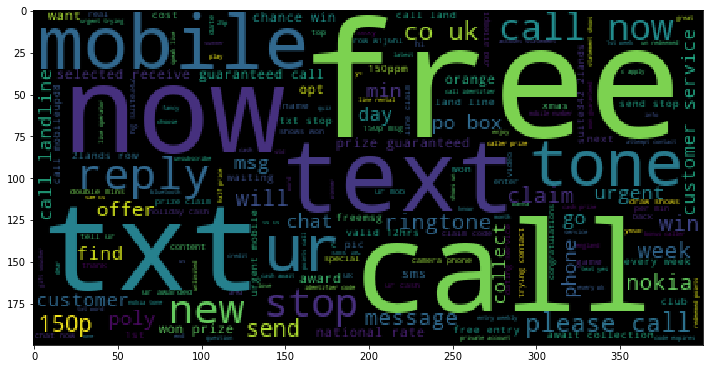

In [25]:
from wordcloud import WordCloud
# WordCloud automatically excludes stop words

# Draw word cloud for spam messages
spam_messages_one_string = " ".join(spam_messages_train.astype(str))
spam_cloud = WordCloud().generate(spam_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

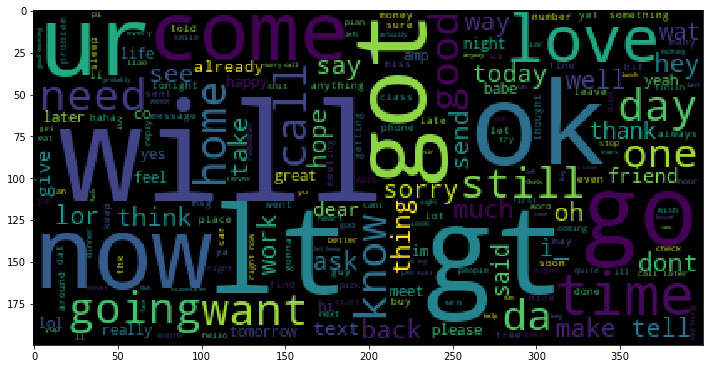

In [26]:
ham_messages_one_string = " ".join(ham_messages_train.astype(str))
ham_cloud = WordCloud().generate(ham_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(ham_cloud)

In [27]:
from collections import Counter
ham_words_list = ham_messages_one_string.split()
total_ham_words = len(ham_words_list)
print("Total number of words in ham messages: ", total_ham_words)
ham_words_dict = Counter(ham_words_list).most_common()
ham_words_dict[:25]

Total number of words in ham messages:  54545


[('i', 1749),
 ('you', 1287),
 ('to', 1262),
 ('the', 882),
 ('a', 843),
 ('u', 730),
 ('and', 657),
 ('in', 627),
 ('my', 585),
 ('is', 565),
 ('me', 462),
 ('of', 413),
 ('for', 402),
 ('have', 343),
 ('that', 341),
 ('your', 334),
 ('it', 327),
 ('so', 319),
 ('but', 319),
 ('are', 316),
 ('at', 313),
 ('not', 307),
 ("i'm", 298),
 ('on', 298),
 ('if', 276)]

In [28]:
spam_words_list = spam_messages_one_string.split()
total_spam_words = len(spam_words_list)
print("Total number of words in spam messages: ", total_spam_words)
spam_words_dict = Counter(spam_words_list).most_common()
spam_words_dict[:25]

Total number of words in spam messages:  14280


[('to', 549),
 ('a', 301),
 ('call', 269),
 ('your', 214),
 ('you', 201),
 ('for', 163),
 ('the', 162),
 ('or', 154),
 ('free', 146),
 ('2', 138),
 ('is', 123),
 ('ur', 115),
 ('on', 114),
 ('txt', 111),
 ('have', 108),
 ('from', 105),
 ('and', 95),
 ('u', 92),
 ('claim', 88),
 ('mobile', 88),
 ('with', 86),
 ('text', 82),
 ('&', 82),
 ('reply', 80),
 ('now', 74)]

In [29]:
from nltk.corpus import stopwords
from collections import defaultdict
import operator

stopwords = set(stopwords.words("english"))

ham_words_lowercase = ham_messages_one_string.lower().split()

ham_words_nostop = []
for word in ham_words_lowercase:
    if word not in stopwords:
        ham_words_nostop.append(word)

ham_words_freq = Counter(ham_words_nostop).most_common()
ham_words_freq[:25]

[('u', 730),
 ("i'm", 298),
 ('&lt;#&gt;', 234),
 ('get', 225),
 ('2', 224),
 ('ur', 199),
 ('go', 196),
 ('.', 188),
 ('got', 188),
 ('come', 173),
 ('call', 172),
 ('like', 169),
 ('know', 164),
 ('?', 153),
 ('good', 150),
 ('...', 141),
 ('going', 135),
 ('ok', 128),
 ('4', 126),
 ("i'll", 126),
 ('love', 121),
 ('still', 120),
 ('want', 119),
 ('time', 119),
 ('one', 116)]

In [30]:
spam_words_lowercase = spam_messages_one_string.lower().split()

spam_words_nostop = []
for word in spam_words_lowercase:
    if word not in stopwords:
        spam_words_nostop.append(word)

spam_words_freq = Counter(spam_words_nostop).most_common()
spam_words_top25 = spam_words_freq[:25]
spam_words_top25

[('call', 269),
 ('free', 146),
 ('2', 138),
 ('ur', 115),
 ('txt', 111),
 ('u', 92),
 ('claim', 88),
 ('mobile', 88),
 ('text', 82),
 ('&', 82),
 ('reply', 80),
 ('4', 74),
 ('get', 71),
 ('stop', 71),
 ('now!', 56),
 ('new', 54),
 ('nokia', 51),
 ('send', 49),
 ('cash', 48),
 ('prize', 47),
 ('please', 45),
 ('win', 44),
 ('-', 43),
 ('contact', 40),
 ('per', 38)]

In [31]:
spam_words_top25_list = [tuple[0] for tuple in spam_words_top25]
ham_words_top25 = [tuple[0] for tuple in ham_words_freq[:25]]

In [32]:
spam_words_top25_pruned = []
for word in spam_words_top25_list:
    if word not in ham_words_top25:
        spam_words_top25_pruned.append(word)
        
ham_words_top25_pruned = []
for word in ham_words_top25:
    if word not in spam_words_top25_list:
        ham_words_top25_pruned.append(word)

print("Number of non-duplicates in each list: ", len(spam_words_top25_pruned))

Number of non-duplicates in each list:  19


In [33]:
for word in (spam_words_top25_pruned + ham_words_top25_pruned):
    df[word] = (word in df['sms_text'])
    X_train[word] = (word in X_train['sms_text'])
    X_test[word] = (word in X_test['sms_text'])
df.head()


C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\neeraj.kumar\Documents\Anaconda2019\envs\nj_tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,label,sms_text,word_count,char_count,is_spam,0,1,2,3,4,...,good,...,going,ok,i'll,love,still,want,time,one
0,ham,"go until jurong point, crazy.. available only ...",20,111,False,0.110996,-0.060531,0.383131,0.166388,0.006478,...,False,False,False,False,False,False,False,False,False,False
1,ham,ok lar... joking wif u oni...,6,29,False,0.347431,-0.194561,0.274425,0.101778,-0.113944,...,False,False,False,False,False,False,False,False,False,False
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,155,True,0.084365,-0.257745,0.231277,0.127906,-0.077953,...,False,False,False,False,False,False,False,False,False,False
3,ham,u dun say so early hor... u c already then say...,11,49,False,-0.038826,-0.020492,0.577905,0.128281,0.296385,...,False,False,False,False,False,False,False,False,False,False
4,ham,"nah i don't think he goes to usf, he lives aro...",13,61,False,0.317802,0.299021,0.135326,0.199348,0.171694,...,False,False,False,False,False,False,False,False,False,False


### Make sure to remove variable that we are going to predict, i.e. label and is_spam feature.

In [34]:
del X_train['sms_text']
del X_train['label']
del X_test['sms_text']
del X_test['label']
del X_train['is_spam']
del X_test['is_spam']
# Split some training data for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

> ###  Apply both XGboost and Lightgbm and compare results.

In [35]:
d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)

[0]	train-error:0.036185	valid-error:0.056054
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
[10]	train-error:0.02216	valid-error:0.036996
[20]	train-error:0.019355	valid-error:0.03139
[30]	train-error:0.017391	valid-error:0.034753
[40]	train-error:0.016269	valid-error:0.030269
[50]	train-error:0.014867	valid-error:0.030269
[60]	train-error:0.013184	valid-error:0.023543
[70]	train-error:0.01122	valid-error:0.023543
[80]	train-error:0.01094	valid-error:0.025785
[90]	train-error:0.010659	valid-error:0.024664
[100]	train-error:0.010098	valid-error:0.023543
[110]	train-error:0.009257	valid-error:0.024664
Stopping. Best iteration:
[62]	train-error:0.012342	valid-error:0.022422



In [36]:
# Predict values for test set
d_test = xgb.DMatrix(X_test)
p_test = bst.predict(d_test)

# Apply function round() to each element in np array
# so predictions are all either 0 or 1.
npround = np.vectorize(round)
p_test_ints = npround(p_test)

# Error rate for test set
accuracy = accuracy_score(y_test, p_test_ints)
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.9757847533632287


In [37]:
y_validd = np.where(y_valid.is_spam==False,0,1 )
y_trainn = np.where(y_train.is_spam==False,0,1 )
y_testt = np.where(y_test.is_spam==False,0,1 )
train_data = lgb.Dataset(X_train,
                         label=(y_trainn.astype(int)),
                        )
param = {'num_leaves':60, 'objective':'binary','max_depth':4,'learning_rate':0.1,'max_bin':2000,"is_unbalance":True,
        #"categorical_feature":[1,2,3,4,5,6,8,10,11,13,14,15,16,17,18],
         'boost_from_average':True,'reg_sqrt':True,
         "boosting":"dart",
         "use_missing":True,
         "zero_as_missing":True,          
         #"max_cat_to_onehot":10,
         "top_k":10000,
         #"cat_smooth":10.0,"cat_l2":10
        "tree_learner":"data",
         "min_child_weight":1.1,
         'sparse_threshold':0.8,
         'is_enable_sparse':True,
         'cat_smooth':10,
         'cat_l2':10
        }
param['metric'] = ['auc', 'binary_logloss']
num_round=5000
lgb_eval = lgb.Dataset(X_valid,
                       label=y_validd.astype(int),
                      ) 
lgg =lgb.train(param,
                train_data,
                num_boost_round=num_round,
                valid_sets=lgb_eval
               ,early_stopping_rounds=10
               
              )

[1]	valid_0's auc: 0.936861	valid_0's binary_logloss: 0.613462
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's auc: 0.962487	valid_0's binary_logloss: 0.549302
[3]	valid_0's auc: 0.970679	valid_0's binary_logloss: 0.493274
[4]	valid_0's auc: 0.979984	valid_0's binary_logloss: 0.449031
[5]	valid_0's auc: 0.980832	valid_0's binary_logloss: 0.40781
[6]	valid_0's auc: 0.980877	valid_0's binary_logloss: 0.373105
[7]	valid_0's auc: 0.976482	valid_0's binary_logloss: 0.343872
[8]	valid_0's auc: 0.976546	valid_0's binary_logloss: 0.356249
[9]	valid_0's auc: 0.975589	valid_0's binary_logloss: 0.328621
[10]	valid_0's auc: 0.976231	valid_0's binary_logloss: 0.303207
[11]	valid_0's auc: 0.978005	valid_0's binary_logloss: 0.280336
[12]	valid_0's auc: 0.977574	valid_0's binary_logloss: 0.288986
[13]	valid_0's auc: 0.978731	valid_0's binary_logloss: 0.268105
[14]	valid_0's auc: 0.979213	valid_0's binary_logloss: 0.249314
[15]	valid_0's auc: 0.980838	valid_0's binary_loglos

In [38]:
# Predict values for test set
lg_pred = pd.DataFrame(lgg.predict(X_test))
lg_pred.index = X_test.index
y_testt = pd.DataFrame(y_testt)
y_testt.index = X_test.index
y_testt = y_testt.rename(columns = {0:'is_spam'})
lg_pred = lg_pred.rename(columns = {0:'Pred'})
finalss = pd.concat([lg_pred,y_testt],axis = 1)


In [39]:
finalss['Pred'] = np.where(finalss['Pred']>0.50,1,0)
confusion_matrix = pd.crosstab(finalss['is_spam'], finalss['Pred'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0    1
Actual             
0          955   10
1            8  142


In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(finalss['is_spam'], finalss['Pred'].astype(int))

0.9681519861830743

#### As we can see there has been significant improvement in our result after adding word embeddings in the form state-of-the-art BERT embedding and results have jumped for both valid as well as test data.

### Applying a simple Neural Network (DNN) to further improve the results.

> The input dataset is mixture of character len + word len + hand-picked subset of words + **BERT** embedding (768 vector len)

In [50]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.models import load_model
import pickle

In [45]:
df.shape

(5572, 811)

> #### Simple Keras model where we can define encoding dimensions and play aroung with it see any improvements. We also use class_Weights here to assist the model in better the distribution of the 2 classes (ham and spam.)

In [57]:
input_dim = X_train.shape[1]
encoding_dim = 150

model = Sequential()
model.add(Dense(encoding_dim, input_dim=input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(int(encoding_dim/2), kernel_initializer='normal', activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()
from sklearn.utils import class_weight
unique_class_weights = np.unique(y_trainn.astype(int))
class_weights = class_weight.compute_class_weight('balanced', unique_class_weights, y_trainn.astype(int))
class_weights_dict = { unique_class_weights[i]: w for i,w in enumerate(class_weights) }
class_weights_dict

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 150)               121350    
_________________________________________________________________
dense_11 (Dense)             (None, 75)                11325     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 76        
Total params: 132,751
Trainable params: 132,751
Non-trainable params: 0
_________________________________________________________________


{0: 0.5813763861709067, 1: 3.5721442885771544}

In [59]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
epoch = 10
batch_size = 32

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])
early = EarlyStopping(monitor="val_loss", mode="min", patience=1)
check_pointer = ModelCheckpoint(filepath="spam.h5", verbose=1, monitor='val_loss', 
                                mode ='min', save_best_only=True)

history = model.fit(X_train, y_trainn.astype(int), epochs=epoch, batch_size=batch_size, shuffle=True,class_weight=class_weights_dict,
                            validation_data=(X_valid, y_validd.astype(int)), verbose=1, callbacks=[check_pointer,early])

Train on 3565 samples, validate on 892 samples
Epoch 1/10
3565/3565 [==============================] - 2s 427us/step - loss: 0.0882 - acc: 0.9722 - val_loss: 0.0726 - val_acc: 0.9742

Epoch 00001: val_loss improved from inf to 0.07261, saving model to spam.h5
Epoch 2/10
3565/3565 [==============================] - 1s 332us/step - loss: 0.0898 - acc: 0.9686 - val_loss: 0.0454 - val_acc: 0.9821

Epoch 00002: val_loss improved from 0.07261 to 0.04543, saving model to spam.h5
Epoch 3/10
3565/3565 [==============================] - 1s 329us/step - loss: 0.0410 - acc: 0.9837 - val_loss: 0.0495 - val_acc: 0.9843

Epoch 00003: val_loss did not improve from 0.04543


In [63]:
### Binary.
nn_pred = pd.DataFrame(model.predict(X_test))
nn_pred.index = y_testt.index
finalss = pd.concat([nn_pred,y_testt],axis = 1)
finalss['Pred'] = np.where(finalss[0]>0.50,1,0)
confusion_matrix = pd.crosstab(finalss['is_spam'], finalss['Pred'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted    0    1
Actual             
0          956    9
1            6  144


In [64]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(finalss['is_spam'], finalss['Pred']) 

0.9753367875647668